In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bucket import create_bucket_synopsis
from lloyd import initialize_spherical_clusters, getClosestCenter
from util import normalise

In [2]:
def lloyd_with_weights(k: int, X: pd.DataFrame, weights: pd.DataFrame, n_iter: int):
    # initalise centers
    C = initialize_spherical_clusters(k, X.shape[1], radius=1)
    # repeat for n_iter for each cluster:
    for _ in range(0, n_iter):
        # assign each point to its closest center
        assignments = X.apply(lambda row: getClosestCenter(row, C), axis=1)
        # update center to be the average of all points assigned
        for i in range(0, len(C)):
            if (assignments == i).any():
                C.iloc[i, :] = (X[assignments == i].mul(weights[assignments == i], axis=0).sum()) / (weights[assignments==i].sum())
    return C

In [3]:
data = normalise(pd.DataFrame(np.concat(
    [np.random.multivariate_normal(mean=[1,1], cov=[[1,0],[0,1]], size=200),
    np.random.multivariate_normal(mean=[5,5], cov=[[1,0],[0,1]], size=200),
    np.random.multivariate_normal(mean=[5,0], cov=[[1,0],[0,1]], size=200)]
)))

weighted_data = create_bucket_synopsis(data, 1, 2, 5, 10, 1)
centers = pd.DataFrame(lloyd_with_weights(3, weighted_data.iloc[:, :2], weighted_data[2], n_iter=2))
print(weighted_data)
print(centers)


           0         1           2
0   0.384064  0.231370    4.297878
1  -0.248565  0.040601   28.623729
2   0.071037 -0.156009  -38.663150
3   0.291485 -0.680908    4.470765
4  -0.434793 -0.185237   94.685752
5   0.338616  0.238590  -68.728540
6   0.002025 -0.058455  167.521989
7   0.248819  1.433478   -6.886779
8   0.009770  0.866149   -9.576120
9   0.136562 -0.089556   15.612977
10  0.051841  0.617991   23.799852
11  0.195743  0.311170   62.129955
12  1.802636  1.949543   13.734269
13  0.370425  0.196818   64.597084
14 -0.732686  0.555186  -14.629863
15  0.475594 -0.149674  -14.815049
16  0.493824 -0.440825  129.380898
17  0.110794 -0.192228  134.779373
18  0.149772  0.134158  -18.268038
          0         1
0  0.184385 -0.240459
1  0.463640  0.479329
2 -0.345644 -0.225428


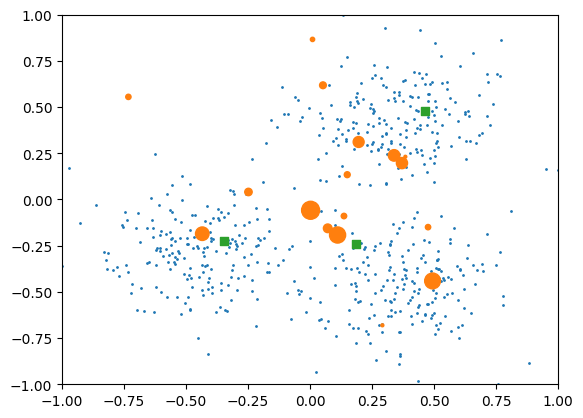

In [4]:
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.scatter(x=data[0], y=data[1], s=1)
plt.scatter(x=weighted_data[0], y=weighted_data[1], s=np.abs(weighted_data[2]))
plt.scatter(x=centers[0], y=centers[1], marker="s")

In [7]:
initialize_spherical_clusters(3, weighted_data.iloc[:, :2].shape[1], radius=1)

,x1,x2
0,0.281180,-0.959655
1,0.623681,0.781679
2,-0.831757,-0.555140
